In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))

import tensorflow as tf
import enviroments

In [2]:
env = enviroments.get_pacman_stack_frames_big()

modelPath  = 'C:\\Users\\Maciej\\pyrepos\\ppo\\retain\\MsPacman-v5v5.0_20231203-143539_5000.actor.h5'
curiusPath = 'C:\\Users\\Maciej\\pyrepos\\ppo\\retain\\MsPacman-v5v5.0_20231203-143539_5000.curiosity.h5'

model = tf.keras.models.load_model(modelPath)

curiosity = tf.keras.models.load_model(curiusPath)

state, _ = env.reset()

from checkout.common import run_episode

rewards, history =  run_episode(env, 
                                model, 
                                lambda x: enviroments.pacman_transform_grayscale_observation_stack_big(x), 
                                show_curiosity=False,
                                save_all=True,
                                limit=1,
                                curiosity=curiosity)


c:\Users\Maciej\miniconda3\envs\tensorflow\lib\site-packages\ale_py\env\gym.py:83: UserWarning: WARN: obs_type "image" should be replaced with the image type, one of: rgb, grayscale
  logger.warn(


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Maciej\miniconda3\envs\tensorflow\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
c:\Users\Maciej\miniconda3\envs\tensorflow\lib\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
Reward: 3940.00 (3940.00 +/- 0.00) - Iterations: 881: 100%|██████████| 1/1 [00:40<00:00, 40.56s/it, 74885]


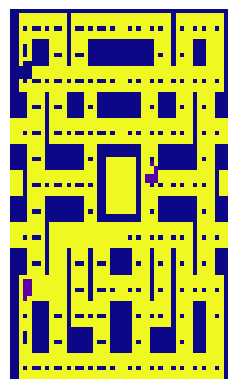

In [3]:
# save 100'th frame as images
import matplotlib.pyplot as plt
import numpy as np


obs = history[0][100][0]

# add transparent background, remove bars with pixel coordinates 
for i in range(6):
    # remove numberlines 
    plt.imshow(obs[:,:,i], cmap='plasma')
    plt.axis('off')
                
    plt.savefig('frame{}.png'.format(i), transparent=True)

In [4]:
history[0][100][3]

array(False)

C:\Users\Maciej\AppData\Local\Temp\ipykernel_1048\1912452753.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread('frame_curiosity.png'.format(i)))


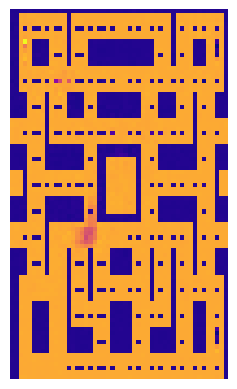

In [6]:

# plt.imshow(history[0][100][4][0, :, :, 0], cmap='plasma')
# plt.axis('off')
# plt.savefig('frame_curiosity.png', transparent=True)
# save 100-150 as giv
import imageio
frames = []
for i in range(100, 150):
    plt.imshow(history[0][i][4][0, :, :, 0], cmap='plasma')
    plt.axis('off')
    plt.savefig('frame_curiosity.png'.format(i), transparent=True)
    frames.append(imageio.imread('frame_curiosity.png'.format(i)))

imageio.mimsave('output.gif', frames, 'GIF', duration=0.1, loop=0)

C:\Users\Maciej\AppData\Local\Temp\ipykernel_1048\2478828267.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread('frame_curiosity.png'.format(i)))


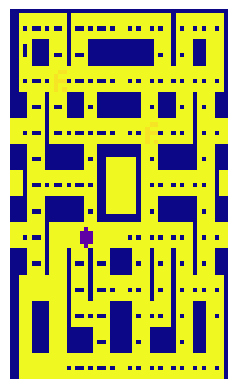

In [10]:
# plt.imshow(history[0][100][4][0, :, :, 0], cmap='plasma')
# plt.axis('off')
# plt.savefig('frame_curiosity.png', transparent=True)
# save 100-150 as giv
import imageio
frames = []
for i in range(100, 150):
    plt.imshow(history[0][i][0][:, :, 0], cmap='plasma')
    plt.axis('off')
    plt.savefig('frame_curiosity.png'.format(i), transparent=True)
    frames.append(imageio.imread('frame_curiosity.png'.format(i)))

imageio.mimsave('output2.gif', frames, 'GIF', duration=0.1, loop=0)